In [1]:
# Load libraries

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Choose seaborn styles

sns.set()
sns.set_theme(style='ticks')
sns.set_palette("muted")

In [3]:
# go to data directory
os.chdir('C:\\Users\\rgarcia\\Documents\\data')

In [4]:
# Downloads zip file, extracts desired csv and deletes zip

# dataset_url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip'
# user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/600.1.17 (KHTML, like Gecko) Version/8.0 Safari/600.1.17'

# os.system(f'wget --header="User-Agent: {user_agent}" {dataset_url}')
# os.system(f'unzip -p {dataset_url.split('/')[-1]} {file_to_extract} > {file_to_extract}')
# os.remove(dataset_url.split('/')[-1])

# Abre o dataset  com os votos

In [5]:
file_to_extract = 'votacao_candidato_munzona_2018_BRASIL.csv'

In [6]:
# Dataset takes 1m45s minute to load in my lame PC

df = pd.read_csv(file_to_extract, sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [7]:
#Filtra para ter só dados de governador primeiro turno

df = df.query('NR_TURNO == 1')
df = df.query('DS_CARGO == "Governador"')

# Escolha o estado para a análise:

In [8]:
# Escolha o estado

chosen_uf = input('Digite a sigla do estado: ').upper()
df = df.query(f'SG_UF == "{chosen_uf}"')

Digite a sigla do estado: SP


In [9]:
#Resultado do primeiro turno
resultado = df.groupby('NM_URNA_CANDIDATO').QT_VOTOS_NOMINAIS.sum().reset_index().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
resultado

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
0,JOÃO DORIA,6431555
3,MARCIO FRANÇA,4358998
4,PAULO SKAF,4269865
1,LUIZ MARINHO,2563922
2,MAJOR COSTA E SILVA,747462
8,ROGERIO CHEQUER,673102
7,RODRIGO TAVARES,649729
6,PROFESSORA LISETE,507236
5,PROF. CLAUDIO FERNANDO,28666
9,TONINHO FERREIRA,16202


In [10]:
# Lista de quem passou ao segundo turno
segundo_turno = resultado[:2].NM_URNA_CANDIDATO.to_list()
segundo_turno

['JOÃO DORIA', 'MARCIO FRANÇA']

In [11]:
# lista de quem foi eliminado
eliminados = [i for i in resultado.NM_URNA_CANDIDATO.to_list() if i not in segundo_turno]
eliminados

['PAULO SKAF',
 'LUIZ MARINHO',
 'MAJOR COSTA E SILVA',
 'ROGERIO CHEQUER',
 'RODRIGO TAVARES',
 'PROFESSORA LISETE',
 'PROF. CLAUDIO FERNANDO',
 'TONINHO FERREIRA']

In [12]:
# encolhe dataframe para colunas necessárias
df = df[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'QT_VOTOS_NOMINAIS']]

In [14]:
# Agrupa por municipio e candidato
agrupa = df.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum()
agrupa = agrupa.reset_index()
agrupa.sample(n=5)

,CD_MUNICIPIO,NM_MUNICIPIO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
5274,70530,SANTA ROSA DE VITERBO,JOÃO DORIA,4031
3950,67792,OLÍMPIA,PROF. CLAUDIO FERNANDO,24
3723,67318,MONTE AZUL PAULISTA,ROGERIO CHEQUER,213
3058,65935,JACUPIRANGA,MAJOR COSTA E SILVA,296
4798,69531,REGISTRO,PAULO SKAF,6148


In [15]:
# Pivota por index municipio coluna candidato e valor vot
pivota = agrupa.pivot(index=(['CD_MUNICIPIO', 'NM_MUNICIPIO']), 
                      columns='NM_URNA_CANDIDATO', 
                      values='QT_VOTOS_NOMINAIS').reset_index()

In [16]:
# Corrige bug que muda votos de int para float

# select numeric columns
numeric_columns = pivota.select_dtypes(include=['number']).columns
# fill 0 to all NaN 
pivota[numeric_columns] = pivota[numeric_columns].fillna(0)
# convert all floats to ints
m = pivota.select_dtypes(np.number)
pivota[m.columns]= m.round().astype('Int64')

In [17]:
# converts column name to match other dataframes
pivota.rename(columns={'CD_MUNICIPIO':'codigo_tse'}, inplace=True)

In [18]:
pivota

NM_URNA_CANDIDATO,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5
...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9


In [20]:
# Retrives dataset for absent voters and null or blank votes
df2 = pd.read_csv('detalhe_votacao_munzona_2018_BRASIL.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

# Filtra estado, governador e primeiro turno
df2 = df2.query(f'SG_UF == "{chosen_uf}"')
df2 = df2.query(f'NR_TURNO == 1')
df2 = df2.query(f'DS_CARGO == "Governador"')

# Filtra colunas para manter só branco, nulo e abstenções
df2 = df2[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']]

# agrupa por municipio
df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'].sum().reset_index()

df2.columns = ['codigo_tse', 'NM_MUNICIPIO', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_14528\1044683636.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'].sum().reset_index()


In [31]:
resultado_municipios = pivota.merge(df2.drop(columns='NM_MUNICIPIO'), how='left', on='codigo_tse')

In [32]:
# IBGE to TSE conversion table
ibge_tse_table = 'https://github.com/betafcc/Municipios-Brasileiros-TSE/raw/master/municipios_brasileiros_tse.csv'

ibge = pd.read_csv(ibge_tse_table)

ibge = ibge[['codigo_tse', 'codigo_ibge']]

In [35]:
resultado_municipios = resultado_municipios.merge(ibge, how='left', on='codigo_tse')

In [36]:
resultado_municipios.sample(n=5)

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,codigo_ibge
393,67431,MURUTINGA DO SUL,588,325,61,547,441,0,11,52,11,0,911,194,445,3532108
61,61611,ARANDU,1501,376,100,882,503,1,15,64,17,4,1334,488,587,3503109
290,65374,ITAÍ,3539,1521,219,2451,1624,11,97,223,133,4,4045,1297,1817,3521804
285,65277,IPUÃ,1806,1055,288,1531,1431,2,62,183,132,4,2423,739,1121,3521309
106,62065,ARCO-ÍRIS,362,136,21,548,225,1,4,43,19,1,515,94,147,3503356


In [45]:
resultado_municipios['VENCEDOR'] = resultado_municipios[segundo_turno + eliminados].idxmax(axis=1).str.title()

In [54]:
resultado_municipios['PCT_BRANCOS_NULOS'] = (resultado_municipios[['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']].sum(axis=1)/ \
resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']].sum(axis=1) *100).round(1)

In [55]:
resultado_municipios

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,codigo_ibge,VENCEDOR,PCT_BRANCOS_NULOS
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2,2573,234,560,3515350,Luiz Marinho,15.7
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5,7107,1685,2491,3500105,João Doria,20.3
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0,442,92,152,3507456,João Doria,13.8
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0,1154,225,461,3500204,João Doria,22.6
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5,2360,558,1080,3553955,João Doria,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2,1631,922,1580,3556800,João Doria,24.1
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1,1233,417,655,3556909,João Doria,25.3
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31,10696,5126,11310,3557006,João Doria,23.1
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9,17186,3146,6821,3557105,João Doria,19.0


In [57]:
resultado_municipios['PCT_ABSTENCOES'] = (resultado_municipios['QT_ABSTENCOES']/ \
resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_ABSTENCOES']].sum(axis=1) *100).round(1)

In [61]:
resultado_municipios['ELEITORADO'] = resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_ABSTENCOES']].sum(axis=1).astype(int)

In [71]:
resultado_municipios['codigo_ibge'] = resultado_municipios['codigo_ibge'].astype(str)

In [ ]:
# Opens Brazilian municipalities map

In [63]:
mun = gpd.read_file(r'C:\Users\rgarcia\Documents\Data\municipios_hires.geojson') # runs in 5 seconds

In [64]:
mun.columns = ['codigo_ibge', 'name', 'description', 'geometry']

In [68]:
mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   codigo_ibge  5564 non-null   object  
 1   name         5564 non-null   object  
 2   description  5564 non-null   object  
 3   geometry     5564 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 174.0+ KB


In [72]:
# Dictionary of ibge codes for UFs
UF_to_code = {'AC': '12', 'AL': '27', 'AP': '16', 'AM': '13', 'BA': '29', 'CE': '23', 'DF': '53', 
              'ES': '32', 'GO': '52', 'MA': '21', 'MT': '51', 'MS': '50', 'MG': '31', 'PA': '15', 
              'PB': '25', 'PR': '41', 'PE': '26', 'PI': '22', 'RN': '24', 'RS': '43', 'RJ': '33', 
              'RO': '11', 'RR': '14', 'SC': '42', 'SP': '35', 'SE': '28', 'TO': '17'}

In [73]:
# Extracts state map from national map
mun = mun[mun['codigo_ibge'].apply(lambda x: x[0:2]) == UF_to_code[chosen_uf]]

<AxesSubplot:>

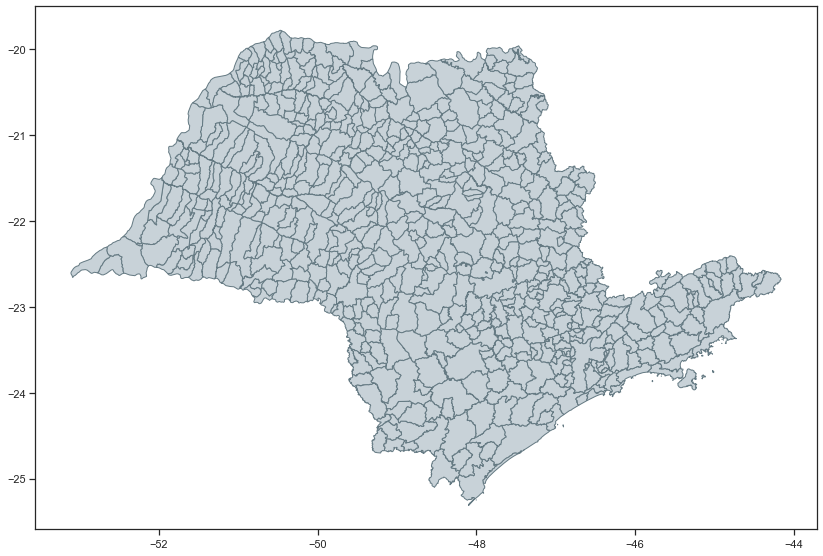

In [75]:
# Checks if map has loaded correctly
mun.plot(edgecolor='#657A83', facecolor='#C8D2D8', linewidth=1, figsize=(14,12))

In [87]:
to_merge = resultado_municipios.drop(columns=['NM_MUNICIPIO', 'codigo_tse'])[segundo_turno + eliminados + ['QT_ABSTENCOES',
       'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'codigo_ibge', 'VENCEDOR',
       'PCT_BRANCOS_NULOS', 'PCT_ABSTENCOES', 'ELEITORADO']]

In [89]:
mun['centroid'] = mun.geometry.centroid

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_14528\3582613145.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['centroid'] = mun.geometry.centroid
C:\Users\rgarcia\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [96]:
mun['longitude'] = mun.centroid.x
mun['latitude'] = mun.centroid.y

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_14528\2982142036.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['longitude'] = mun.centroid.x
C:\Users\rgarcia\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_14528\2982142036.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['latitude'] = mun.cen

In [99]:
mun = mun.drop(columns='description')

In [103]:
resultado_municipios = mun.merge(to_merge)

In [106]:
resultado_municipios['name'] = resultado_municipios.name + '-' + chosen_uf

In [110]:
resultado_municipios

,codigo_ibge,name,geometry,centroid,longitude,latitude,JOÃO DORIA,MARCIO FRANÇA,PAULO SKAF,LUIZ MARINHO,...,PROFESSORA LISETE,PROF. CLAUDIO FERNANDO,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,VENCEDOR,PCT_BRANCOS_NULOS,PCT_ABSTENCOES,ELEITORADO
0,3500105,Adamantina-SP,"POLYGON ((-51.05787 -21.39888, -51.05365 -21.4...",POINT (-51.05616 -21.57630),-51.056162,-21.576304,6371,4487,3183,906,...,134,6,5,7107,1685,2491,João Doria,20.3,25.7,27698
1,3500204,Adolfo-SP,"POLYGON ((-49.65478 -21.20607, -49.63847 -21.2...",POINT (-49.65281 -21.28808),-49.652815,-21.288078,830,497,600,213,...,16,1,0,1154,225,461,João Doria,22.6,27.5,4193
2,3500303,Aguaí-SP,"POLYGON ((-47.20890 -21.97129, -47.20297 -21.9...",POINT (-47.03971 -22.04960),-47.039711,-22.049605,4696,2215,3026,1507,...,150,33,8,4634,1656,2946,João Doria,26.0,20.8,22324
3,3500402,Águas da Prata-SP,"POLYGON ((-46.70755 -21.82895, -46.70380 -21.8...",POINT (-46.69131 -21.91376),-46.691310,-21.913757,1427,799,771,347,...,55,7,3,1583,356,626,João Doria,20.5,24.8,6383
4,3500501,Águas de Lindóia-SP,"POLYGON ((-46.61147 -22.43496, -46.60302 -22.4...",POINT (-46.60305 -22.47405),-46.603049,-22.474052,3581,2176,1399,356,...,109,16,5,3350,631,1633,João Doria,20.4,23.2,14437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,Votorantim-SP,"POLYGON ((-47.37268 -23.51783, -47.37047 -23.5...",POINT (-47.40599 -23.57923),-47.405992,-23.579232,20056,7409,10067,7455,...,1840,68,31,10696,5126,11310,João Doria,23.1,13.0,81990
641,3557105,Votuporanga-SP,"POLYGON ((-50.02073 -20.33347, -50.01275 -20.3...",POINT (-49.98817 -20.45815),-49.988170,-20.458153,16704,6924,11908,3005,...,449,35,9,17186,3146,6821,João Doria,19.0,24.7,69601
642,3557154,Zacarias-SP,"POLYGON ((-49.99521 -21.03253, -49.98434 -21.0...",POINT (-50.04907 -21.12492),-50.049071,-21.124921,569,225,342,183,...,7,1,2,621,97,305,João Doria,22.0,25.3,2451
643,3557204,Chavantes-SP,"POLYGON ((-49.68539 -22.94866, -49.68396 -22.9...",POINT (-49.72615 -23.04595),-49.726146,-23.045948,1835,1719,1223,586,...,65,5,6,852,530,918,João Doria,20.0,10.5,8096


In [116]:
resultado_municipios['index_vencedor'] = resultado_municipios.VENCEDOR.apply(lambda x: resultado.NM_URNA_CANDIDATO.str.title().to_list().index(x))

In [121]:
candidatos = segundo_turno+eliminados

In [124]:
resultado_municipios.columns = [i.title() if i in candidatos else i.lower() for i in resultado_municipios.columns]

In [132]:
resultado_municipios = resultado_municipios.sort_values(by='index_vencedor').reset_index(drop=True)

In [162]:
eliminados_t = [i.title() for i in eliminados]

In [171]:
segundo_turno_t = [i.title() for i in segundo_turno]

In [167]:
resultado_municipios['votos_perdedores'] = resultado_municipios[eliminados_t].sum(axis=1).astype(int)

In [179]:
resultado_municipios['pct_votos_perdedores'] = (resultado_municipios[eliminados_t].sum(axis=1)/resultado_municipios[segundo_turno_t + eliminados_t].sum(axis=1)*100).round(1)

In [182]:
resultado_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   codigo_ibge             645 non-null    object  
 1   name                    645 non-null    object  
 2   geometry                645 non-null    geometry
 3   centroid                645 non-null    geometry
 4   longitude               645 non-null    float64 
 5   latitude                645 non-null    float64 
 6   João Doria              645 non-null    Int64   
 7   Marcio França           645 non-null    Int64   
 8   Paulo Skaf              645 non-null    Int64   
 9   Luiz Marinho            645 non-null    Int64   
 10  Major Costa E Silva     645 non-null    Int64   
 11  Rogerio Chequer         645 non-null    Int64   
 12  Rodrigo Tavares         645 non-null    Int64   
 13  Professora Lisete       645 non-null    Int64   
 14  Prof. Claudio Fern

# Candidatos vencedores por município

In [206]:
list(resultado_municipios.vencedor.unique())

['João Doria', 'Marcio França', 'Paulo Skaf', 'Luiz Marinho']

<AxesSubplot:>

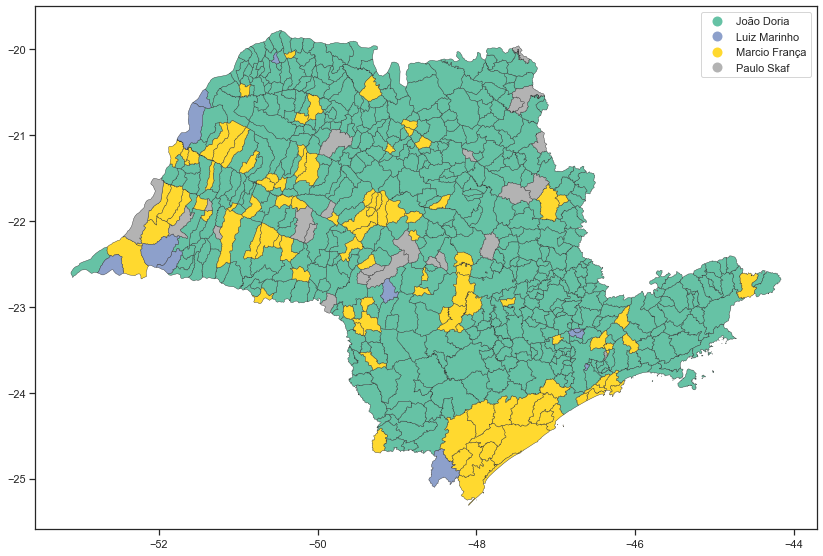

In [207]:
resultado_municipios.plot(column='vencedor', cmap='Set2', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4)

### **Mapa para referência:** [Clique aqui](http://www.sp-turismo.com/municipios-sp.htm)

# Votos em candidatos que não passaram ao 2º turno
**OBS:** (% dos votos válidos)

<AxesSubplot:>

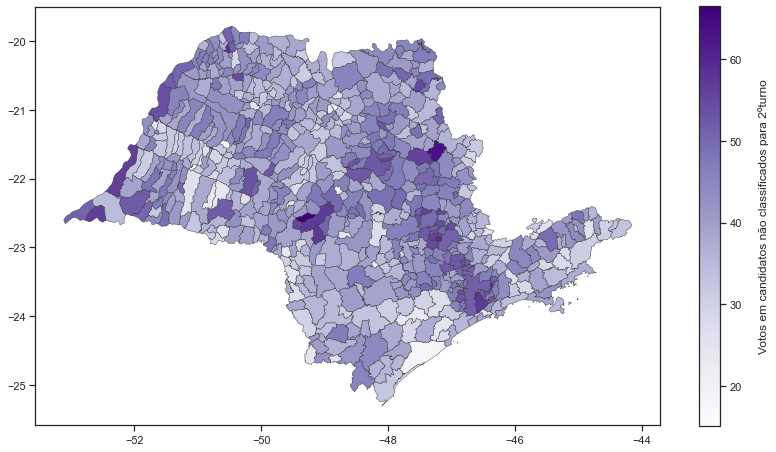

In [189]:
resultado_municipios.plot(column='pct_votos_perdedores', figsize=(14,12), cmap='Purples',
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label': "\nVotos em candidatos não classificados para 2ºturno"})

# Porcentagem de brancos e nulos
**OBS:** (% do eleitorado total, incluindo abstenções)

<AxesSubplot:>

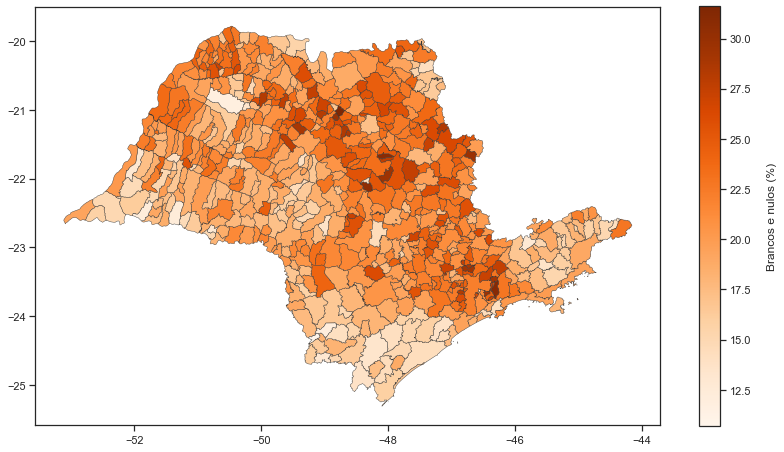

In [191]:
resultado_municipios.plot(column='pct_brancos_nulos', figsize=(14,12), cmap='Oranges', 
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nBrancos e nulos (%)'})

# Porcentagem de abstenções

<AxesSubplot:>

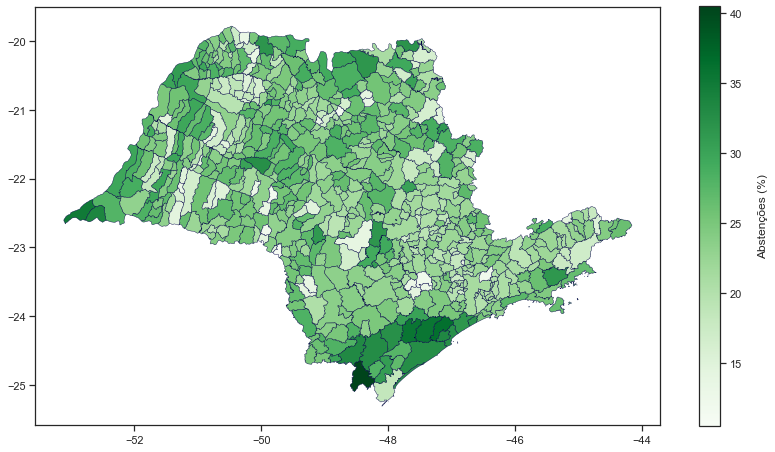

In [259]:
resultado_municipios.plot(column='pct_abstencoes', figsize=(14,12), cmap='Greens',
                   edgecolor='#000044', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nAbstenções (%)'})

# Tamanho do eleitorado em cada município
**OBS**: Proporção em relação à capital

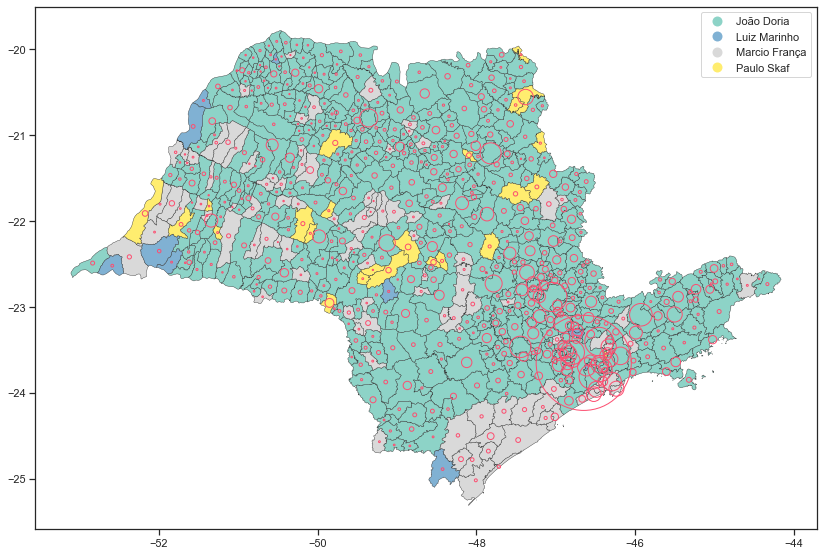

In [260]:
votantes = resultado_municipios.set_geometry("centroid").\
plot(ax=resultado_municipios.plot(column='vencedor', cmap='Set3', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4), 
     markersize=resultado_municipios['eleitorado']/1000, color='#fc4f7100', edgecolors='#fc4f71ff',
     figsize=(40,40), legend=True, zorder=1)

In [262]:
resultado_municipios.query('eleitorado > 250000')[['name', 'eleitorado'] + segundo_turno_t + eliminados_t + ['vencedor']].sort_values(by='eleitorado', ascending=False)

,name,eleitorado,João Doria,Marcio França,Paulo Skaf,Luiz Marinho,Major Costa E Silva,Rogerio Chequer,Rodrigo Tavares,Professora Lisete,Prof. Claudio Fernando,Toninho Ferreira,vencedor
82,São Paulo-SP,9050681,1460836,1229116,1220740,901063,131437,257403,135431,198058,7546,5104,João Doria
110,Campinas-SP,849183,165170,90612,99800,70047,29403,26199,19041,19514,749,454,João Doria
551,Guarulhos-SP,814371,139125,139315,91435,82751,17344,13570,23688,13006,632,409,Marcio França
71,São Bernardo do Campo-SP,620862,111307,57680,71415,101340,12971,17246,10548,10768,408,338,João Doria
69,Santo André-SP,572955,112911,59681,73273,55321,15095,16272,10366,11380,488,279,João Doria
324,Osasco-SP,569445,106076,69551,67245,51804,10810,13885,10577,10471,462,336,João Doria
87,São José dos Campos-SP,508499,133799,55926,54667,32070,17533,16420,22007,8428,412,1716,João Doria
497,Sorocaba-SP,458763,120356,47948,63002,31147,15944,10872,12720,10962,424,199,João Doria
432,Ribeirão Preto-SP,443220,99663,53513,45611,19210,9805,12158,12264,8503,474,186,João Doria
542,Santos-SP,343707,60781,84326,33209,14583,10321,9036,6345,6690,533,111,Marcio França
